In [1]:
# import useful libraries
import numpy as np
import torch
import matplotlib.pyplot as plt

import os
import sys

# add parent directory to sys.path to import STL package modules
PARENT_DIR = os.path.dirname(os.path.abspath(os.getcwd() + "../../../"))
sys.path.append(PARENT_DIR)
print("Parent directory added to sys.path:", ".../" + PARENT_DIR.split("/")[-1])

# test data directory
DATA_TEST_PATH = PARENT_DIR + "/data" + "/test"
print("Dataset dirctory used:", ".../" + PARENT_DIR.split("/")[-1] + DATA_TEST_PATH.split(PARENT_DIR.split("/")[-1])[-1])


from STL_main.STL_2D_FFT_Torch import STL_2D_FFT_Torch as STLDataClass

Parent directory added to sys.path: .../STL-Dev
Dataset dirctory used: .../STL-Dev/data/test


In [2]:
# command to auto-reload modules when they are edited (easier for testing and debugging)
%load_ext autoreload
%autoreload 2

shape data = (256, 256)
shape data_full = (20, 256, 256)


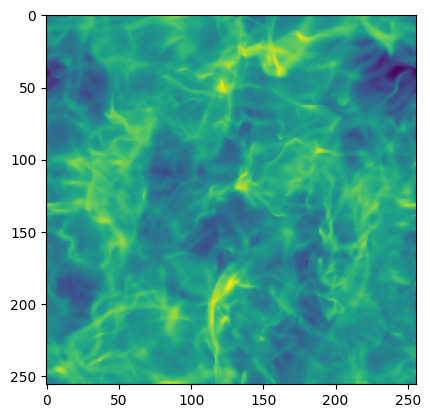

In [3]:
# Load some data
data_full = np.load(DATA_TEST_PATH + "/" + "Turb_6.npy")
data = data_full[0]
print("shape data = " + str(data.shape))
print("shape data_full = " + str(data_full.shape))
plt.imshow(data)

In [4]:
# Initialization of StlData for MR=False
stl_data = STLDataClass(data)

In [5]:
# Construct the wavelet operator
Wave_Op = stl_data.get_wavelet_op(J=3, L=4)
J = Wave_Op.J
L = Wave_Op.L
print("J =", J, ", L =", L)

J = 3 , L = 4


## Load data and create StlData object

## Full Conv in MR=False

In [6]:
# Compute the wavelet transform
WT = Wave_Op.apply(stl_data)

In [7]:
# Test of WT parameters 
print("For stl_data:")
print("DT = " + str(WT.DT))
print("MR = " + str(WT.MR))
print("dg = " + str(WT.dg))
print("N0 = " + str(WT.N0))
print("fourier_status = " + str(WT.fourier_status))
print("Type array = " + str(type(WT.array)))
print("Size array = " + str(WT.array.shape))

For stl_data:
DT = 2D_FFT_Torch
MR = False
dg = 0
N0 = (256, 256)
fourier_status = True
Type array = <class 'torch.Tensor'>
Size array = torch.Size([3, 4, 256, 256])


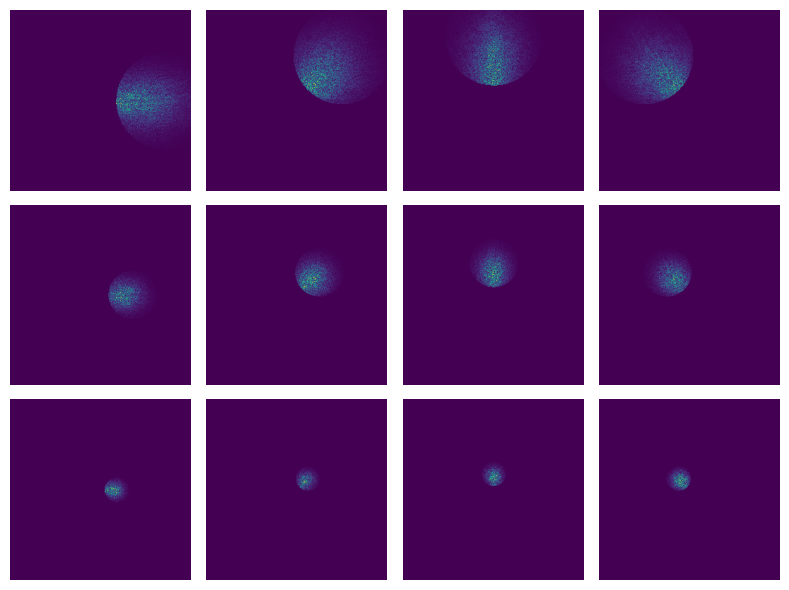

In [8]:
# Plot in Fourier space
WT.set_fourier_status(True)

# Plot the wavelet transform
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT.array[j, l].abs(), dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

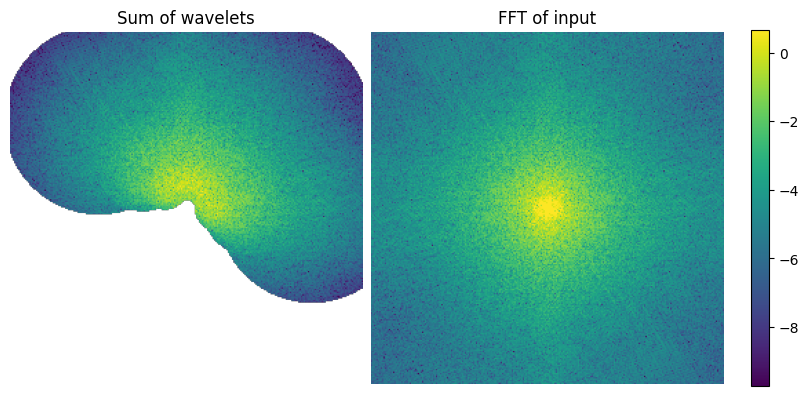

In [9]:
# Compare the abs of the Fourier Transform of data and of the sum of the convolved fields
# Note that doing Fourier -> real -> Fourier duplicates the Fourier support of the wavelets (k -> -k)
WT.set_fourier_status(True, inplace=True) 
stl_data.set_fourier_status(True, inplace=True)

# Compute the images
img1 = torch.fft.fftshift(torch.log(WT.array.abs().sum(dim=(0,1))), dim=(-2,-1)).numpy()
img2 = torch.fft.fftshift(torch.log(stl_data.array.abs()), dim=(-2,-1)).numpy()

# Compute global vmin and vmax for consistent color scale
vmin = max(np.nanmin(img1), np.nanmin(img2))
vmax = min(np.nanmax(img1), np.nanmax(img2))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

im1 = axs[0].imshow(img1, vmin=vmin, vmax=vmax)
axs[0].set_title('Sum of wavelets')
axs[0].axis('off')

im2 = axs[1].imshow(img2, vmin=vmin, vmax=vmax)
axs[1].set_title('FFT of input')
axs[1].axis('off')

# Add a single shared colorbar
fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.025, pad=0.04)
plt.show()

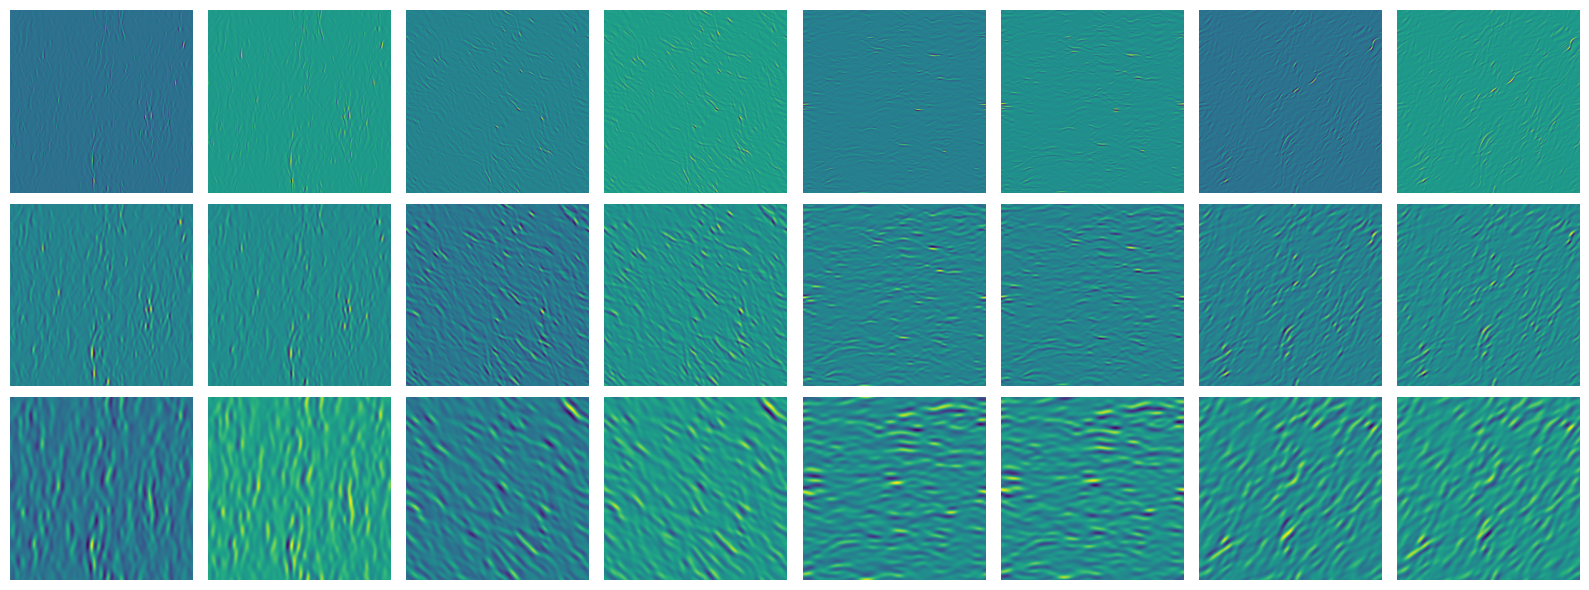

In [10]:
# Plot in real space
WT.set_fourier_status(False, inplace=True)

# Plot the real and imaginary parts of the wavelet transform
fig, axs = plt.subplots(J, 2 * L, figsize=(4 * L, 2 * J))
axs = axs.reshape(J, 2*L)

for j in range(J):
    for l in range(L):
        ax = axs[j, 2*l]
        ax.imshow(WT.array[j, l].real) # real part
        ax.axis('off')
        ax = axs[j, 2*l+1]
        ax.imshow(WT.array[j, l].imag) # imaginary part
        ax.axis('off')
plt.tight_layout()
plt.show()

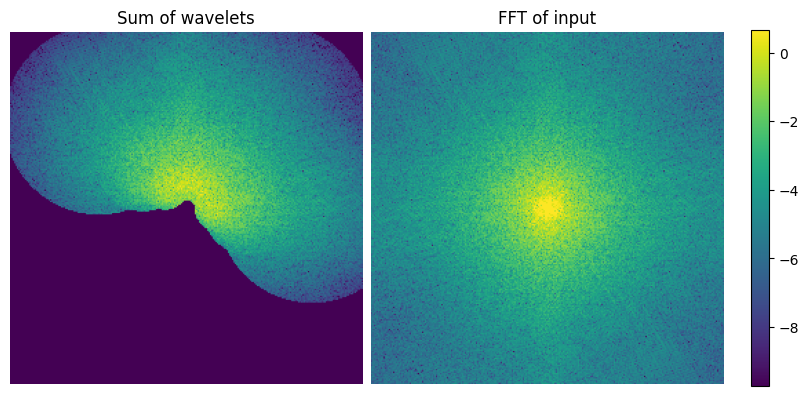

In [11]:
# Compare the abs of the Fourier Transform of data and of the sum of the convolved fields
# Note that doing Fourier -> real -> Fourier duplicates the Fourier support of the wavelets (k -> -k)
WT.set_fourier_status(True, inplace=True) 
stl_data.set_fourier_status(True, inplace=True)

# Compute the images
img1 = torch.fft.fftshift(torch.log(WT.array.abs().sum(dim=(0,1))), dim=(-2,-1)).numpy()
img2 = torch.fft.fftshift(torch.log(stl_data.array.abs()), dim=(-2,-1)).numpy()

# Compute global vmin and vmax for consistent color scale
vmin = max(np.nanmin(img1), np.nanmin(img2))
vmax = min(np.nanmax(img1), np.nanmax(img2))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

im1 = axs[0].imshow(img1, vmin=vmin, vmax=vmax)
axs[0].set_title('Sum of wavelets')
axs[0].axis('off')

im2 = axs[1].imshow(img2, vmin=vmin, vmax=vmax)
axs[1].set_title('FFT of input')
axs[1].axis('off')

# Add a single shared colorbar
fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.025, pad=0.04)
plt.show()

## Scale by scale convolution in MR=True

In [ ]:
j = 3

In [13]:
# Create MR data
stl_data_Nj = Wave_Op.downsample(stl_data, dg_out=j, inplace=False)
print("For stl_data_Nj:")
print("DT = " + str(stl_data_Nj.DT))
print("MR = " + str(stl_data_Nj.MR))
print("dg = " + str(stl_data_Nj.dg))
print("N0 = " + str(stl_data_Nj.N0))
print("fourier_status = " + str(stl_data_Nj.fourier_status))
print("Type array = " + str(type(stl_data_Nj.array)))
print("Size array = " + str(stl_data_Nj.array.shape))

For stl_data_Nj:
DT = 2D_FFT_Torch
MR = False
dg = 3
N0 = (32, 32)
fourier_status = True
Type array = <class 'torch.Tensor'>
Size array = torch.Size([32, 32])


In [14]:
# Compute the wavelet transform at scale j
WT_j = Wave_Op.apply(stl_data_Nj, j=j)
print("For WT_j:")
print("DT = " + str(WT_j.DT))
print("MR = " + str(WT_j.MR))
print("dg = " + str(WT_j.dg))
print("N0 = " + str(WT_j.N0))
print("fourier_status = " + str(WT_j.fourier_status))
print("Type array = " + str(type(WT_j.array)))
print("Size array = " + str(WT_j.array.shape))

Exception: Data and wavelet transform should have same N0

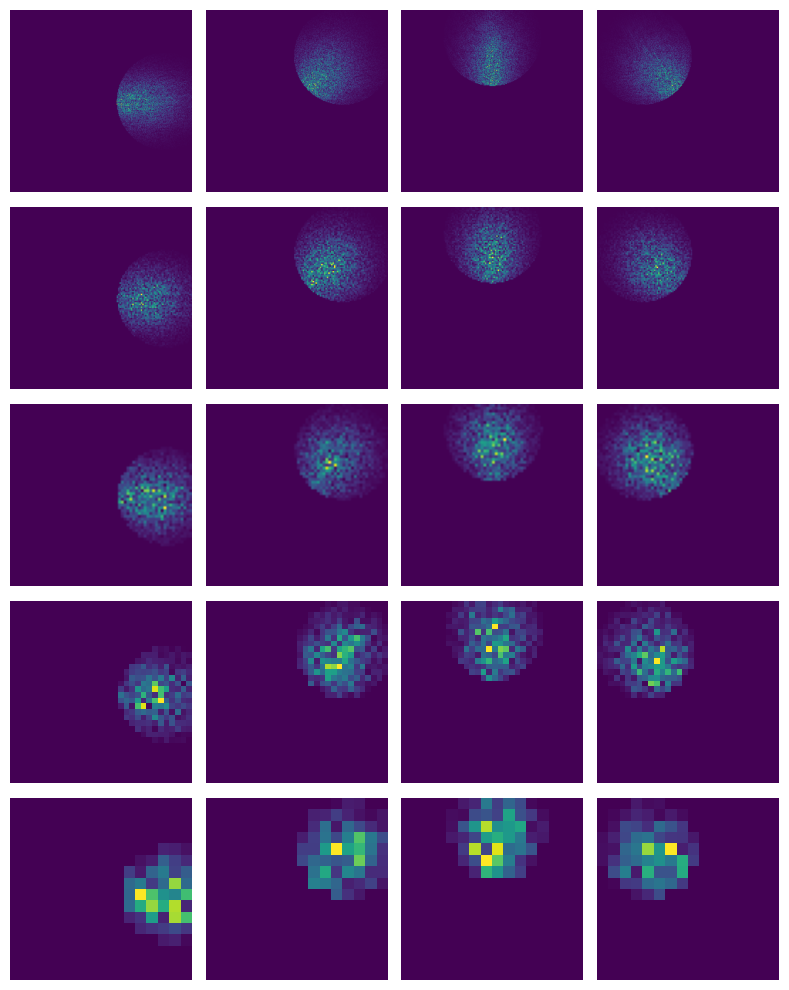

In [41]:
# Plot in Fourier space
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    stl_data_Nj = stl_data.downsample(Wave_Op.j_to_dg[j], copy=True)
    WT_j = Wave_Op.apply(stl_data_Nj, j=j)
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT_j.array[l].abs(), dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

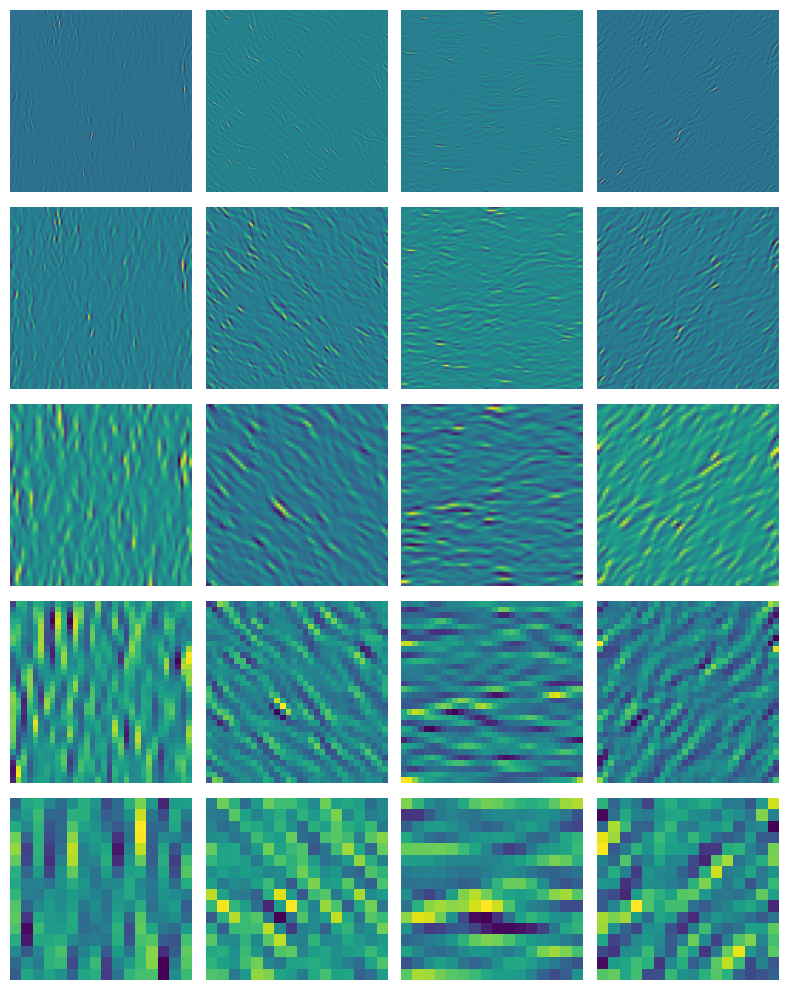

In [42]:
# Plot in real space
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    stl_data_Nj = stl_data.downsample(Wave_Op.j_to_dg[j], copy=True)
    WT_j = Wave_Op.apply(stl_data_Nj, j=j)
    WT_j.out_fourier(False)
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT_j.array[l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

## Full Conv in MR=True with non-standard sizes

In [43]:
# Initialization of StlData for MR=False
DT = "DT1"
stl_data2 = StlData(DT, data[:187, :249])
# Construct the wavelet operator
Wave_Op2 = Wavelet_Operator(stl_data2.DT, stl_data2.N0)
J2 = Wave_Op2.J

In [44]:
# Create MR data
stl_data2_MR = stl_data2.downsample_toMR(Wave_Op2.dg_max)
print("For stl_data2_MR:")
print("DT = " + str(stl_data2_MR.DT))
print("MR = " + str(stl_data2_MR.MR))
print("dg = " + str(stl_data2_MR.dg))
print("N0 = " + str(stl_data2_MR.N0))
print("list_dg = " + str(stl_data2_MR.list_dg))
print("Fourier = " + str(stl_data2_MR.Fourier))
print("Type array = " + str(type(stl_data2_MR.array)))
print("Size array = " + str(stl_data2_MR.array[0].shape))

For stl_data2_MR:
DT = DT1
MR = True
dg = None
N0 = (187, 249)
list_dg = [0, 1, 2, 3]
Fourier = True
Type array = <class 'list'>
Size array = torch.Size([187, 249])


In [45]:
# Compute the wavelet transform
WT2_MR = Wave_Op2.apply(stl_data2_MR, MR=True)

In [46]:
# Test of WT_MR parameters 
print("For WT2_MR:")
print("DT = " + str(WT2_MR.DT))
print("MR = " + str(WT2_MR.MR))
print("dg = " + str(WT2_MR.dg))
print("N0 = " + str(WT2_MR.N0))
print("list_dg = " + str(WT2_MR.list_dg))
print("Fourier = " + str(WT2_MR.Fourier))
print("Type array = " + str(type(WT2_MR.array)))
print("Size array = " + str(WT2_MR.array[3].shape))

For WT2_MR:
DT = DT1
MR = True
dg = None
N0 = (187, 249)
list_dg = [0, 1, 2, 3, 3]
Fourier = True
Type array = <class 'list'>
Size array = torch.Size([4, 22, 30])


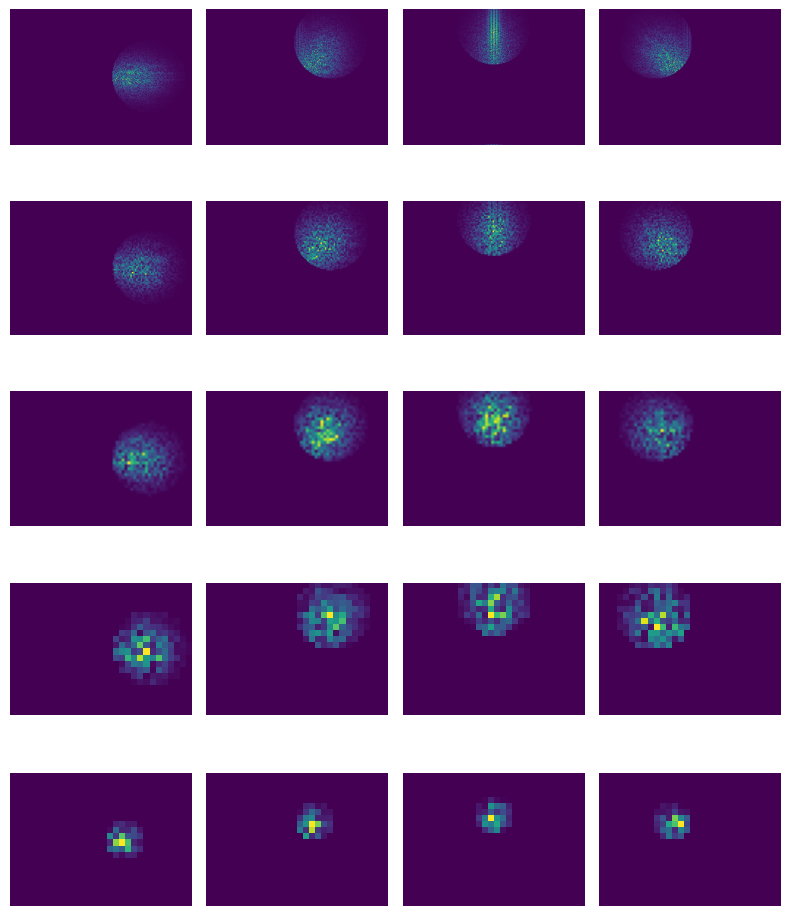

In [47]:
# Plot in Fourier space
WT2_MR.out_fourier(True)

# Plot the wavelet transform
fig, axs = plt.subplots(J2, L, figsize=(2 * L, 2 * J2))
axs = axs.reshape(J2, L)

for j in range(J2):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT2_MR.array[j][l].abs(), dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

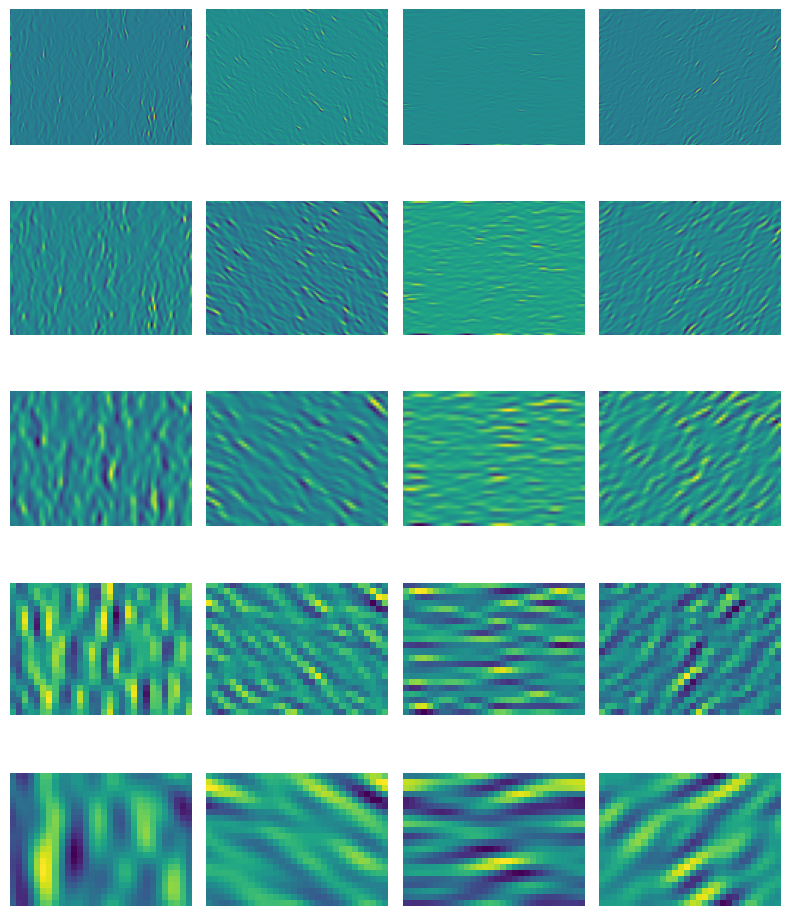

In [48]:
# Plot in real space
WT2_MR.out_fourier(False)

# Plot the wavelet transform
fig, axs = plt.subplots(J2, L, figsize=(2 * L, 2 * J2))
axs = axs.reshape(J2, L)

for j in range(J2):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(WT2_MR.array[j][l])
        ax.axis('off')

plt.tight_layout()
plt.show()